In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import chain
from skimage import io
##Import any other packages you may need here

EDA is open-ended, and it is up to you to decide how to look at different ways to slice and dice your data. A good starting point is to look at the requirements for the FDA documentation in the final part of this project to guide (some) of the analyses you do. 

This EDA should also help to inform you of how pneumonia looks in the wild. E.g. what other types of diseases it's commonly found with, how often it is found, what ages it affects, etc. 

Note that this NIH dataset was not specifically acquired for pneumonia. So, while this is a representation of 'pneumonia in the wild,' the prevalence of pneumonia may be different if you were to take only chest x-rays that were acquired in an ER setting with suspicion of pneumonia. 

Perform the following EDA:
* The patient demographic data such as gender, age, patient position,etc. (as it is available)
* The x-ray views taken (i.e. view position)
* The number of cases including: 
    * number of pneumonia cases,
    * number of non-pneumonia cases
* The distribution of other diseases that are comorbid with pneumonia
* Number of disease per patient 
* Pixel-level assessments of the imaging data for healthy & disease states of interest (e.g. histograms of intensity values) and compare distributions across diseases.

Note: use full NIH data to perform the first a few EDA items and use `sample_labels.csv` for the pixel-level assassements. 

Also, **describe your findings and how will you set up the model training based on the findings.**

In [2]:
## Below is some helper code to read all of your full image filepaths into a dataframe for easier manipulation
## Load NIH data
##adding cleaned header names to avoid confusion and acceesing errors due to spacing symbols
clean_header=["image_index","finding_labels","follow_up","patient_id",
              "patient_age","patient_gender","view_position","image_width",
              "image_height","image_pixel_spacing_x","image_pixel_spacing_y","unnamed"]
all_xray_df = pd.read_csv('/data/Data_Entry_2017.csv',header=0,names=clean_header)
## Load sample data for pixel level assessments
sample_df = pd.read_csv('sample_labels.csv',header=0,names=clean_header[:-1])
#all_xray_df.sample(10)
sample_df.sample(10)

,image_index,finding_labels,follow_up,patient_id,patient_age,patient_gender,view_position,image_width,image_height,image_pixel_spacing_x,image_pixel_spacing_y
2141,00011051_000.png,No Finding,0,11051,056Y,F,PA,2766,2681,0.143,0.143
5475,00029813_009.png,Emphysema|Pleural_Thickening|Pneumothorax,9,29813,066Y,M,AP,3056,2544,0.139,0.139
213,00001170_054.png,No Finding,54,1170,026Y,M,AP,2500,2048,0.168,0.168
3229,00015926_000.png,No Finding,0,15926,054Y,M,PA,2736,2665,0.143,0.143
2896,00014265_018.png,Infiltration|Mass,18,14265,024Y,M,PA,2886,2991,0.143,0.143
203,00001106_000.png,Edema|Fibrosis,0,1106,068Y,F,PA,2590,2991,0.143,0.143
3291,00016243_002.png,No Finding,2,16243,061Y,M,PA,2992,2991,0.143,0.143
2525,00012681_043.png,No Finding,43,12681,060Y,F,AP,2500,2048,0.168,0.168
2914,00014356_012.png,No Finding,12,14356,061Y,F,PA,2850,2991,0.143,0.143
4273,00021086_009.png,Effusion|Pleural_Thickening,9,21086,062Y,M,PA,2992,2991,0.143,0.143


In [3]:
## EDA
# Todo 

In [4]:
# Checking for general information, null, zero values
print("general information =")
print(all_xray_df.info())
print("\nnumber of zero values in each col= \n",all_xray_df.isin([0]).sum())

general information =
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112120 entries, 0 to 112119
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   image_index            112120 non-null  object 
 1   finding_labels         112120 non-null  object 
 2   follow_up              112120 non-null  int64  
 3   patient_id             112120 non-null  int64  
 4   patient_age            112120 non-null  int64  
 5   patient_gender         112120 non-null  object 
 6   view_position          112120 non-null  object 
 7   image_width            112120 non-null  int64  
 8   image_height           112120 non-null  int64  
 9   image_pixel_spacing_x  112120 non-null  float64
 10  image_pixel_spacing_y  112120 non-null  float64
 11  unnamed                0 non-null       float64
dtypes: float64(3), int64(5), object(4)
memory usage: 10.3+ MB
None

number of zero values in each col= 
 image_index        

In [5]:
# Removing the unnamed col because all it's values are null
all_xray_df.pop("unnamed")
all_xray_df.head(10)

,image_index,finding_labels,follow_up,patient_id,patient_age,patient_gender,view_position,image_width,image_height,image_pixel_spacing_x,image_pixel_spacing_y
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143
5,00000003_001.png,Hernia,1,3,74,F,PA,2500,2048,0.168,0.168
6,00000003_002.png,Hernia,2,3,75,F,PA,2048,2500,0.168,0.168
7,00000003_003.png,Hernia|Infiltration,3,3,76,F,PA,2698,2991,0.143,0.143
8,00000003_004.png,Hernia,4,3,77,F,PA,2500,2048,0.168,0.168
9,00000003_005.png,Hernia,5,3,78,F,PA,2686,2991,0.143,0.143


In [6]:
# Checking for number of unique values in each column 
all_xray_df.nunique()

image_index              112120
finding_labels              836
follow_up                   184
patient_id                30805
patient_age                 107
patient_gender                2
view_position                 2
image_width                 904
image_height               1137
image_pixel_spacing_x        23
image_pixel_spacing_y        23
dtype: int64

In [7]:
# Demographic distribution for gender
#grouping the df using ["patient_id","patient_gender"] because these are the only keys constant per patient
group_list=["patient_id","patient_gender"]
agg_list=[x for x in clean_header[:-1] if x not in group_list ]
grouped_df=all_xray_df.groupby(group_list)[agg_list].agg(lambda x: 
                                                        list([y for y in x] ) ).reset_index()

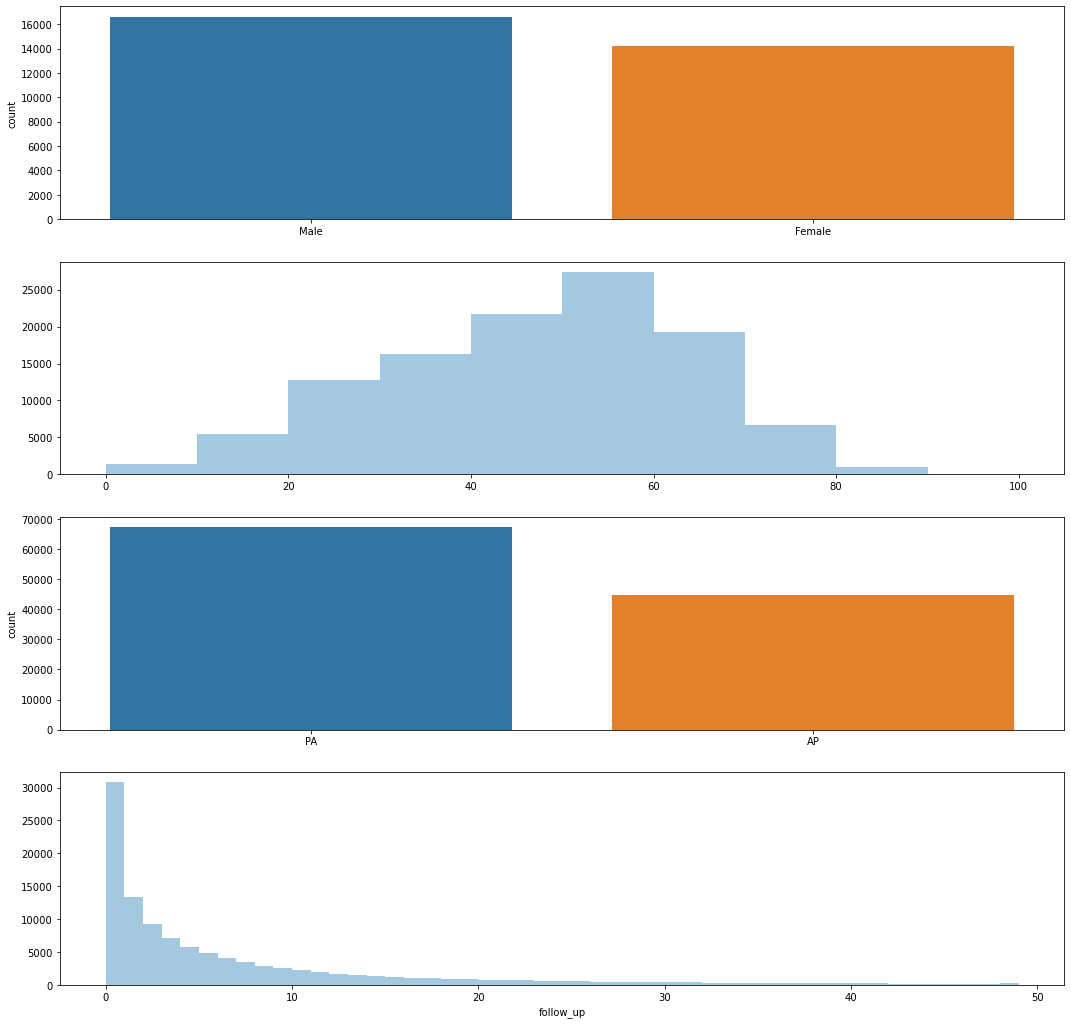

In [8]:
#grouping is done for gender only because it's fixed per patient and the rest of the demographic analysis
#is done on a scan level

figure,axes=plt.subplots(4,1,figsize=(18,18))
sns.countplot(grouped_df["patient_gender"].replace({"M":"Male","F":"Female"}).values,ax=axes[0])
sns.distplot(all_xray_df["patient_age"].values,ax=axes[1],bins=[x*10 for x in range(11)],norm_hist=False,kde=False)
sns.distplot(all_xray_df["follow_up"],ax=axes[3],bins=[x*1 for x in range(50)],norm_hist=False,kde=False)
## position EDA
sns.countplot(all_xray_df["view_position"].values,ax=axes[2])

In [9]:
grouped_df_findings_sep=grouped_df.copy()
grouped_df_findings_sep["finding_labels"]=grouped_df_findings_sep["finding_labels"].apply(lambda x:np.unique(list(chain(*[y.split("|") for y in x]))))
grouped_df_findings_sep.head(5)

,patient_id,patient_gender,image_index,finding_labels,follow_up,patient_age,view_position,image_width,image_height,image_pixel_spacing_x,image_pixel_spacing_y
0,1,M,"[00000001_000.png, 00000001_001.png, 00000001_...","[Cardiomegaly, Effusion, Emphysema]","[0, 1, 2]","[58, 58, 58]","[PA, PA, PA]","[2682, 2894, 2500]","[2749, 2729, 2048]","[0.14300000000000002, 0.14300000000000002, 0.168]","[0.14300000000000002, 0.14300000000000002, 0.168]"
1,2,M,[00000002_000.png],[No Finding],[0],[81],[PA],[2500],[2048],[0.171],[0.171]
2,3,F,"[00000003_000.png, 00000003_001.png, 00000003_...","[Hernia, Infiltration]","[0, 1, 2, 3, 4, 5, 6, 7]","[81, 74, 75, 76, 77, 78, 79, 80]","[PA, PA, PA, PA, PA, PA, PA, PA]","[2582, 2500, 2048, 2698, 2500, 2686, 2992, 2582]","[2991, 2048, 2500, 2991, 2048, 2991, 2991, 2905]","[0.14300000000000002, 0.168, 0.168, 0.14300000...","[0.14300000000000002, 0.168, 0.168, 0.14300000..."
3,4,M,[00000004_000.png],"[Mass, Nodule]",[0],[82],[AP],[2500],[2048],[0.168],[0.168]
4,5,F,"[00000005_000.png, 00000005_001.png, 00000005_...","[Effusion, Infiltration, No Finding]","[0, 1, 2, 3, 4, 5, 6, 7]","[69, 69, 69, 69, 70, 70, 70, 70]","[PA, AP, AP, PA, PA, PA, PA, PA]","[2048, 2500, 2500, 2992, 2986, 2514, 2992, 2566]","[2500, 2048, 2048, 2991, 2991, 2991, 2991, 2681]","[0.168, 0.168, 0.168, 0.14300000000000002, 0.1...","[0.168, 0.168, 0.168, 0.14300000000000002, 0.1..."


In [10]:
#np.unique(list(chain(*all_xray_df["finding_labels"].values)))
findings= ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema',
       'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration',
       'Mass', 'Nodule', 'Pleural_Thickening', 'Pneumonia',
       'Pneumothorax']

In [11]:
grouped_df_findings_sep["finding_labels"]=grouped_df_findings_sep["finding_labels"].apply(lambda x:[y for y in x if y in findings])
grouped_df_findings_sep.head(5)

,patient_id,patient_gender,image_index,finding_labels,follow_up,patient_age,view_position,image_width,image_height,image_pixel_spacing_x,image_pixel_spacing_y
0,1,M,"[00000001_000.png, 00000001_001.png, 00000001_...","[Cardiomegaly, Effusion, Emphysema]","[0, 1, 2]","[58, 58, 58]","[PA, PA, PA]","[2682, 2894, 2500]","[2749, 2729, 2048]","[0.14300000000000002, 0.14300000000000002, 0.168]","[0.14300000000000002, 0.14300000000000002, 0.168]"
1,2,M,[00000002_000.png],[],[0],[81],[PA],[2500],[2048],[0.171],[0.171]
2,3,F,"[00000003_000.png, 00000003_001.png, 00000003_...","[Hernia, Infiltration]","[0, 1, 2, 3, 4, 5, 6, 7]","[81, 74, 75, 76, 77, 78, 79, 80]","[PA, PA, PA, PA, PA, PA, PA, PA]","[2582, 2500, 2048, 2698, 2500, 2686, 2992, 2582]","[2991, 2048, 2500, 2991, 2048, 2991, 2991, 2905]","[0.14300000000000002, 0.168, 0.168, 0.14300000...","[0.14300000000000002, 0.168, 0.168, 0.14300000..."
3,4,M,[00000004_000.png],"[Mass, Nodule]",[0],[82],[AP],[2500],[2048],[0.168],[0.168]
4,5,F,"[00000005_000.png, 00000005_001.png, 00000005_...","[Effusion, Infiltration]","[0, 1, 2, 3, 4, 5, 6, 7]","[69, 69, 69, 69, 70, 70, 70, 70]","[PA, AP, AP, PA, PA, PA, PA, PA]","[2048, 2500, 2500, 2992, 2986, 2514, 2992, 2566]","[2500, 2048, 2048, 2991, 2991, 2991, 2991, 2681]","[0.168, 0.168, 0.168, 0.14300000000000002, 0.1...","[0.168, 0.168, 0.168, 0.14300000000000002, 0.1..."


In [12]:
## split finding_labels key to list in the ungrouped df
xray_split_df=all_xray_df.copy()
xray_split_df_s=sample_df.copy()
xray_split_df["finding_labels"]=xray_split_df["finding_labels"].apply(lambda x:x.split("|"))
xray_split_df_s["finding_labels"]=xray_split_df_s["finding_labels"].apply(lambda x:x.split("|"))
xray_split_df.head()
xray_split_df_s.head()

,image_index,finding_labels,follow_up,patient_id,patient_age,patient_gender,view_position,image_width,image_height,image_pixel_spacing_x,image_pixel_spacing_y
0,00000013_005.png,"[Emphysema, Infiltration, Pleural_Thickening, ...",5,13,060Y,M,AP,3056,2544,0.139,0.139
1,00000013_026.png,"[Cardiomegaly, Emphysema]",26,13,057Y,M,AP,2500,2048,0.168,0.168
2,00000017_001.png,[No Finding],1,17,077Y,M,AP,2500,2048,0.168,0.168
3,00000030_001.png,[Atelectasis],1,30,079Y,M,PA,2992,2991,0.143,0.143
4,00000032_001.png,"[Cardiomegaly, Edema, Effusion]",1,32,055Y,F,AP,2500,2048,0.168,0.168


In [13]:
#convert the findings colum to seperate columns
findings= ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema',
       'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration',
       'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia',
       'Pneumothorax']
findings_split_df=pd.DataFrame(columns=findings)
findings_split_df_s=pd.DataFrame(columns=findings)

In [14]:
findings_split_df.head()


,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax


In [15]:
for finding in findings:
    findings_split_df[finding]=xray_split_df["finding_labels"].agg(lambda x: 1 if finding  in x else 0)
    findings_split_df_s[finding]=xray_split_df_s["finding_labels"].agg(lambda x: 1 if finding  in x else 0)

In [16]:
findings_split_df_s.head(5)
#len(findings)

,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1
1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0


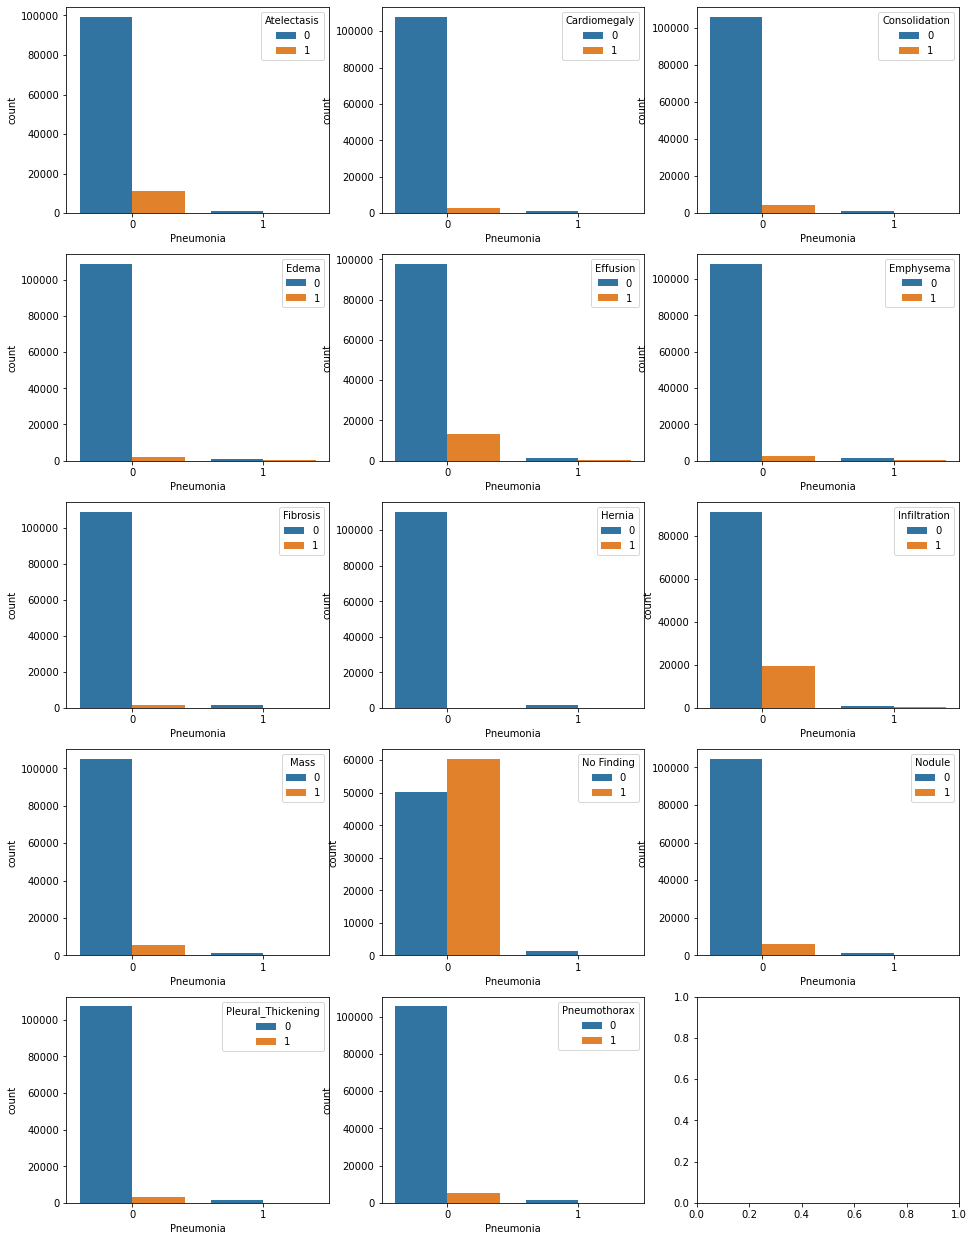

In [17]:
figure,axes=plt.subplots(5,3,figsize=(16,22))
ind=0
axes=axes.flatten()
for i in [x for x in findings if x is not 'Pneumonia']:
    sns.countplot( data=findings_split_df,x="Pneumonia",hue=i,ax=axes[ind])
    #axes[ind].set_xlabel('Pneumonia')
    #axes[ind].set_ylabel(i)
    ind+=1

In [18]:
# number of cases related to pneumonia finding
print(findings_split_df["Pneumonia"].value_counts())
print(findings_split_df_s["Pneumonia"].value_counts())

0    110689
1      1431
Name: Pneumonia, dtype: int64
0    5544
1      62
Name: Pneumonia, dtype: int64


In [19]:
#percentage of other findings cooccurance with pneumonia

findings_split_df[findings_split_df["Pneumonia"]==1][[x for x in findings if x is not 'Pneumonia']].sum()/findings_split_df["Pneumonia"].sum()

Atelectasis           0.183089
Cardiomegaly          0.028651
Consolidation         0.085954
Edema                 0.237596
Effusion              0.187980
Emphysema             0.016073
Fibrosis              0.007687
Hernia                0.002096
Infiltration          0.422781
Mass                  0.049616
No Finding            0.000000
Nodule                0.048917
Pleural_Thickening    0.033543
Pneumothorax          0.028651
dtype: float64

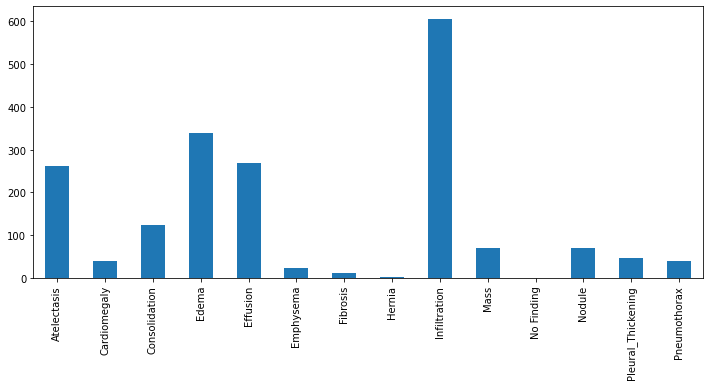

In [20]:
#co occurance is high in infiltration edema, effusion
plt.figure(figsize=(12,5))
findings_split_df[findings_split_df["Pneumonia"]==1][[x for x in findings if x is not 'Pneumonia']].sum().plot(kind='bar')


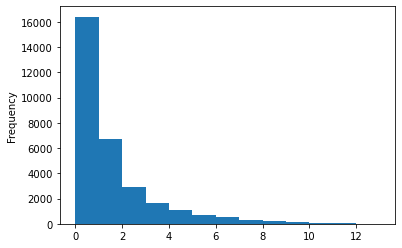

In [21]:
# distribution of number of diseases per patient
#we will use the patient_idm gender grouped df 
grouped_df_findings_sep.head(5)
grouped_df_findings_sep["finding_labels"].agg(lambda x :len(x)).plot(kind='hist',bins=[x for x in range(14)])

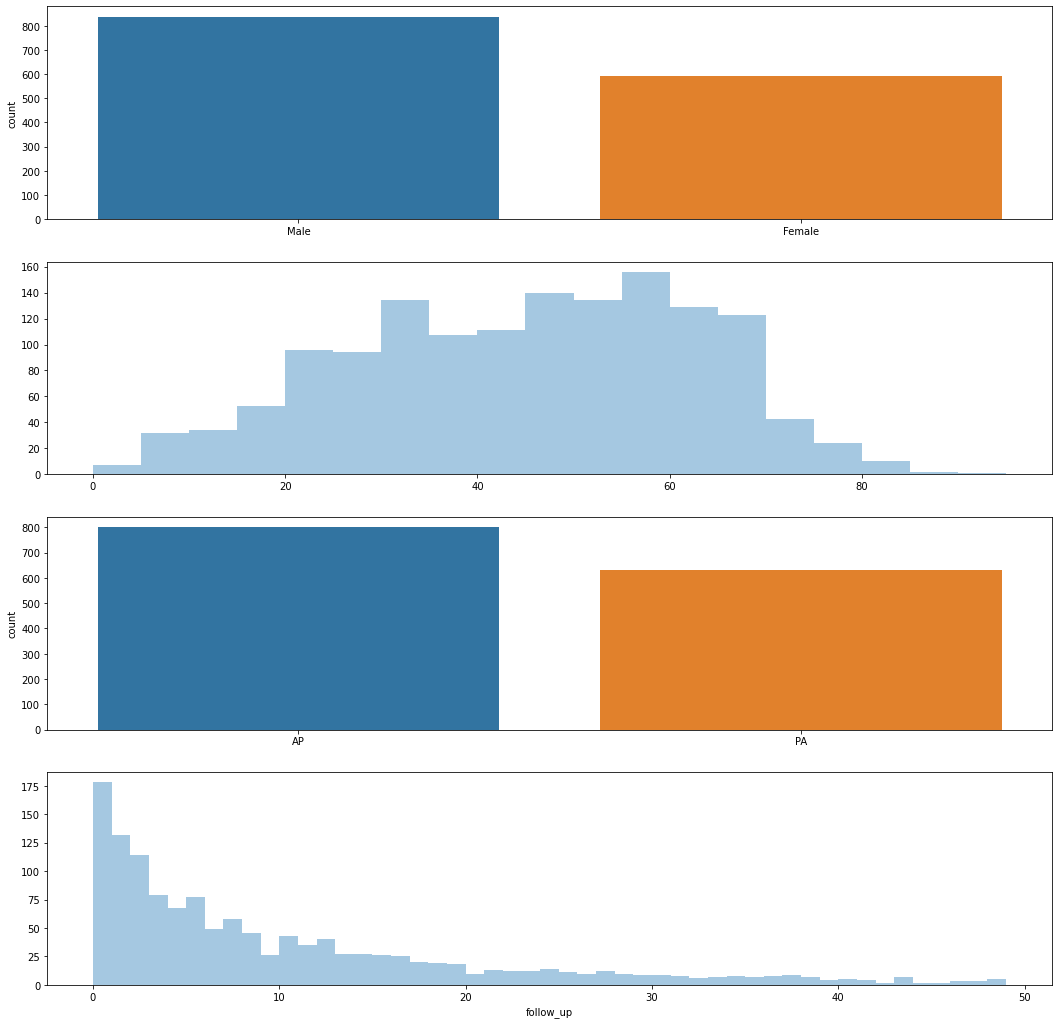

In [45]:
#demographic ananlysis for people with pneumonia
sample_df_concat=xray_split_df.copy()
#sample_df_concat.head()
sample_df_concat=pd.concat([sample_df_concat,findings_split_df],axis=1)
positive_pneumonia_df=sample_df_concat[sample_df_concat["Pneumonia"]==1]
figure4,axes4=plt.subplots(4,1,figsize=(18,18))
sns.countplot(positive_pneumonia_df["patient_gender"].replace({"M":"Male","F":"Female"}).values,ax=axes4[0])
sns.distplot(positive_pneumonia_df["patient_age"].values,ax=axes4[1],bins=[x*5 for x in range(20)],norm_hist=False,kde=False)
sns.distplot(positive_pneumonia_df["follow_up"],ax=axes4[3],bins=[x*1 for x in range(50)],norm_hist=False,kde=False)
## position EDA
sns.countplot(positive_pneumonia_df["view_position"].values,ax=axes4[2])
#positive_pneumonia_df.head(10)

In [23]:
#pixel level EDA
#
sample_df_concat=xray_split_df_s.copy()
#sample_df_concat.head()
sample_df_concat=pd.concat([sample_df_concat,findings_split_df_s],axis=1)



In [24]:
sample_df_concat.head(5)

,image_index,finding_labels,follow_up,patient_id,patient_age,patient_gender,view_position,image_width,image_height,image_pixel_spacing_x,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00000013_005.png,"[Emphysema, Infiltration, Pleural_Thickening, ...",5,13,060Y,M,AP,3056,2544,0.139,...,1,0,0,1,0,0,0,1,0,1
1,00000013_026.png,"[Cardiomegaly, Emphysema]",26,13,057Y,M,AP,2500,2048,0.168,...,1,0,0,0,0,0,0,0,0,0
2,00000017_001.png,[No Finding],1,17,077Y,M,AP,2500,2048,0.168,...,0,0,0,0,0,1,0,0,0,0
3,00000030_001.png,[Atelectasis],1,30,079Y,M,PA,2992,2991,0.143,...,0,0,0,0,0,0,0,0,0,0
4,00000032_001.png,"[Cardiomegaly, Edema, Effusion]",1,32,055Y,F,AP,2500,2048,0.168,...,0,0,0,0,0,0,0,0,0,0


In [25]:
all_image_paths = {os.path.basename(x): x for x in 
                   glob(os.path.join('/data','images*', '*', '*.png'))}
sample_df_concat['path'] = sample_df_concat['image_index'].map(all_image_paths.get)
sample_df_concat.sample(3)

,image_index,finding_labels,follow_up,patient_id,patient_age,patient_gender,view_position,image_width,image_height,image_pixel_spacing_x,...,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax,path
2461,00012364_003.png,[Infiltration],3,12364,052Y,F,AP,2500,2048,0.168,...,0,0,1,0,0,0,0,0,0,/data/images_006/images/00012364_003.png
4668,00023359_000.png,[No Finding],0,23359,061Y,M,PA,2992,2991,0.143,...,0,0,0,0,1,0,0,0,0,/data/images_010/images/00023359_000.png
4940,00026040_000.png,[No Finding],0,26040,030Y,M,PA,2992,2991,0.143,...,0,0,0,0,1,0,0,0,0,/data/images_011/images/00026040_000.png


In [26]:
images_positive=sample_df_concat[sample_df_concat["Pneumonia"]==1]["path"].values
images_negative=sample_df_concat[sample_df_concat["Pneumonia"]==0]["path"].sample(62,axis=0,random_state=0).values

In [27]:
len(images_negative)
len(images_positive)

62

In [28]:
positive_samples=[]
negative_samples=[]
for im in images_positive:
    image=io.imread(im).flatten()
    positive_samples.extend(image)
for im in images_negative:
    image=io.imread(im).flatten()
    negative_samples.extend(image)

In [ ]:
sns.distplot(negative_samples,bins=[x for x in range(50,245)],kde=False,norm_hist=False)#,cmap="gray")

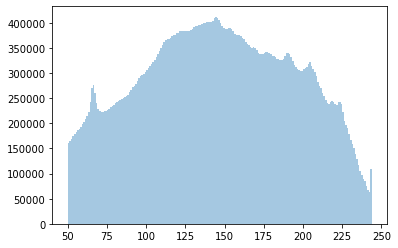

In [30]:
# pixel intensities for xrays with pneumonia
#
hist_positives=sns.distplot(positive_samples,bins=[x for x in range(50,245)],kde=False,norm_hist=False)#,cmap="gray")

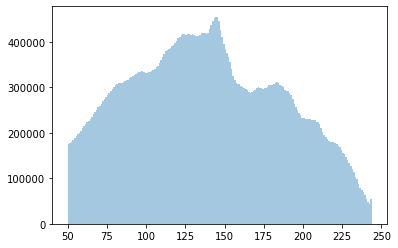

In [31]:
# pixel intensities for xrays without pneumonia, samples are taken randomly
#accros the df
hist_negatives=sns.distplot(negative_samples,bins=[x for x in range(50,245)],kde=False,norm_hist=False)#,cmap="gray")

In [32]:
findings_split_df_s[findings].agg(lambda x :x.value_counts())

,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,5098,5465,5380,5488,4962,5479,5522,5593,4639,5322,2562,5293,5430,5544,5335
1,508,141,226,118,644,127,84,13,967,284,3044,313,176,62,271


In [33]:
findings= ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema',
       'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration',
       'Mass', 'Nodule', 'Pleural_Thickening', 'Pneumonia',
       'Pneumothorax']

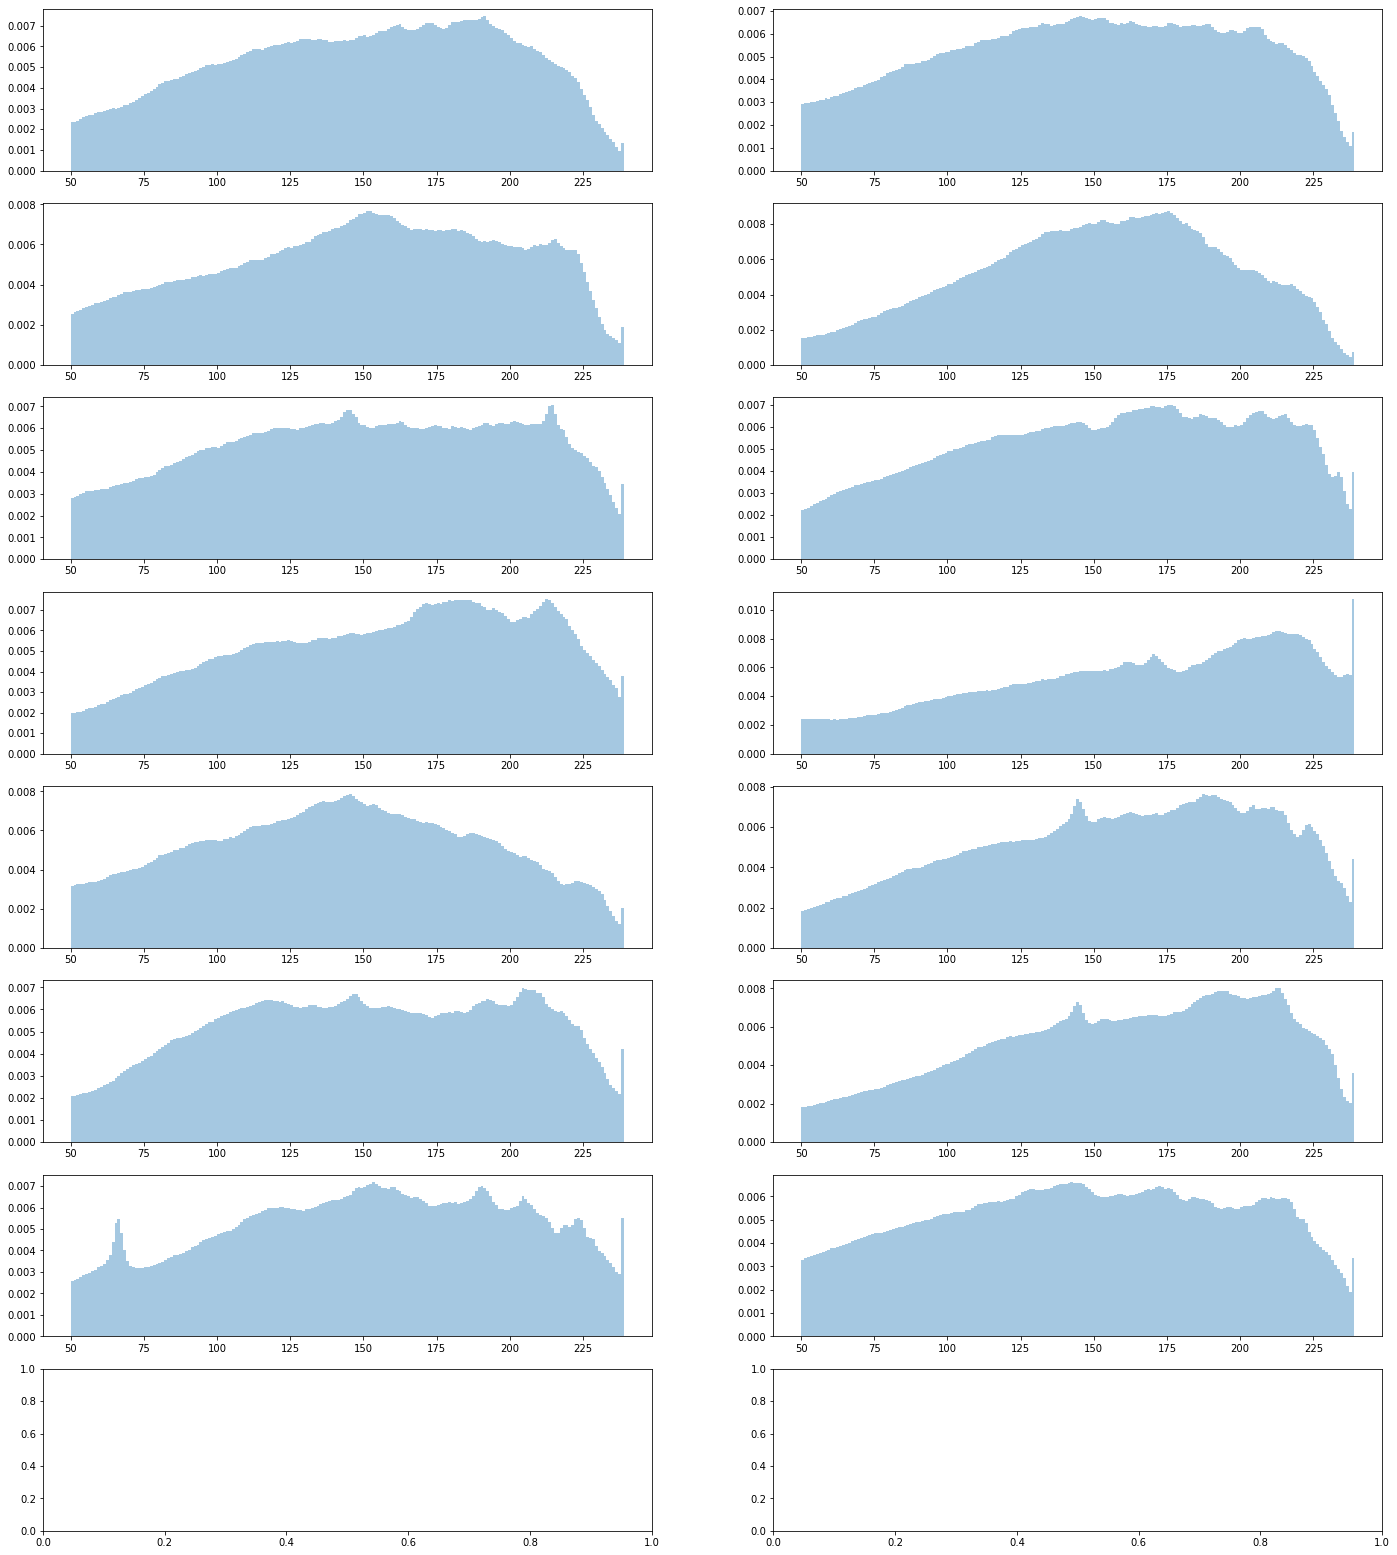

In [35]:
#pixel intensities for all findings ,data will be normalized because the number of 
#finding are diffenrent accros different findings
figure3,axes3=plt.subplots(8,2,figsize=(24,28))
axes3=axes3.flatten()
ind2=0
for disease in findings:
    pixe_data=[]
    im_paths=sample_df_concat[sample_df_concat[disease]==1]["path"].values
    if len(im_paths)>32:
        im_paths=im_paths[:31]
    for im in im_paths:
        image=io.imread(im).flatten()
        pixe_data.extend(image)
    sns.distplot(pixe_data,bins=[x for x in range(50,240)],kde=False,
                ax=axes3[ind2],norm_hist=True)
    ind2+=1